## **Predicting Student Performance Based on Study Hours: A Simple Linear Regression Approach**

### **Introduction**
Understanding the factors influencing student performance is essential for enhancing academic outcomes. This project explores the relationship between study hours and student scores using simple linear regression, a statistical method that models the relationship between a dependent variable and an independent variable. Using a dataset of study hours and corresponding scores, we will develop a predictive model to estimate student performance based on study habits, providing insights for educators and students to improve academic results.

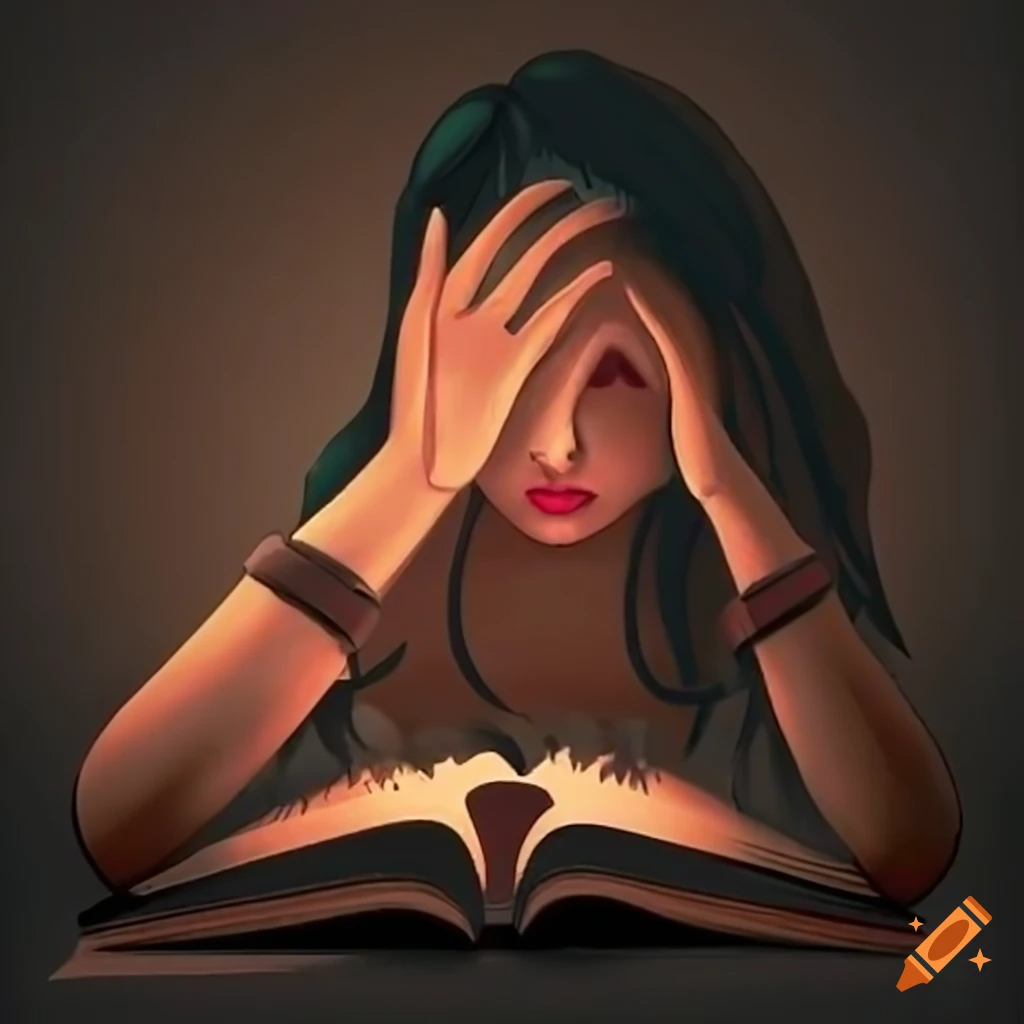

### ***Setup and Import Libraries***
Start by importing the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

### ***Load the Data***

In [6]:
#read the csv data from the data source which is a url
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### ***Exploratory Data Analysis (EDA)***
Examine the data to understand its structure and summary statistics.

In [8]:
# Checking the structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [10]:
# Summary statistics
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [11]:
#Checking if the data is normally distributed
df.skew()

Hours     0.190338
Scores    0.233965
dtype: float64

In [12]:
#Checking for outliers
df.kurtosis()

Hours    -1.302343
Scores   -1.443833
dtype: float64

**The data is symmetric and there are no considerable outliers in the data**

##### ***Graphical Analysis of the data***

In [14]:
print(plt.style.available)
plt.style.use('fivethirtyeight')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


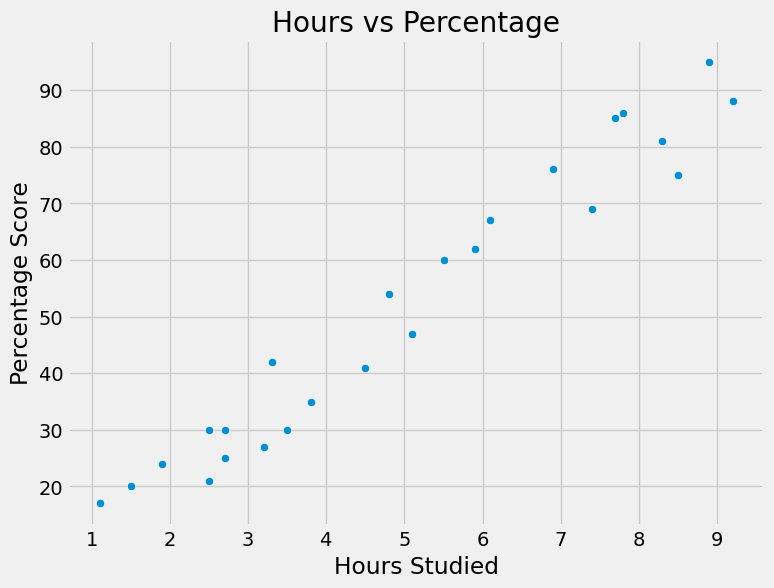

In [17]:
#Visualizing the relationship between the study hours and scores
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Hours', y='Scores')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

**From the data we can see that there is a positive linear relationship between the number of study hours and the percentage score. That is the more hours of study the higher the score will be**

### ***Data Preparation***
We will separate the features (independent variable) and target (dependent variable).

In [19]:
# Define features and target
X = df[['Hours']]  # Features
y = df['Scores']   # Target

### ***Data Split***
Now we will split the data into training and testing sets. 80% of the data will be used to train the model while 20% will be used to test the model

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

### ***Train the Model***
Now we will train the simple linear regression model.

In [21]:
# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

print("The Linear Regression Model has been trained")

The Linear Regression Model has been trained


### ***Making  Predictions***
Let's use the model to make predictions on the test set.

In [23]:
print(X_test) # print test data
y_pred = model.predict(X_test) # Predicting the scores using test data

    Hours
14    1.1
0     2.5
17    1.9
6     9.2
23    6.9


### ***Evaluate the Model***
Evaluate the model's performance using metrics like Mean Absolute Error (MAE) and R-squared.

In [24]:
mae = mean_absolute_error(y_test, y_pred) # Mean Absolute Error (MAE)
r2 = r2_score(y_test, y_pred) # R-squared

print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Absolute Error: 4.877039354964484
R-squared: 0.9735538080811826


A Mean Absolute Error (MAE) of 4.877 indicates that, on average, the model's predictions are approximately 4.88 units away from the actual values. This suggests that the model is making relatively accurate predictions.

The R-squared value of 0.973 indicates that approximately 97.3% of the variance in the target variable can be explained by the linear relationship with the predictor variable(s).

In [29]:
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df_check

,Actual,Predicted
14,17,12.442587
0,21,26.359448
17,24,20.395079
6,88,92.961570
23,76,70.098155


### ***Visualization of Predictions***
Visualize the regression line and the predictions.

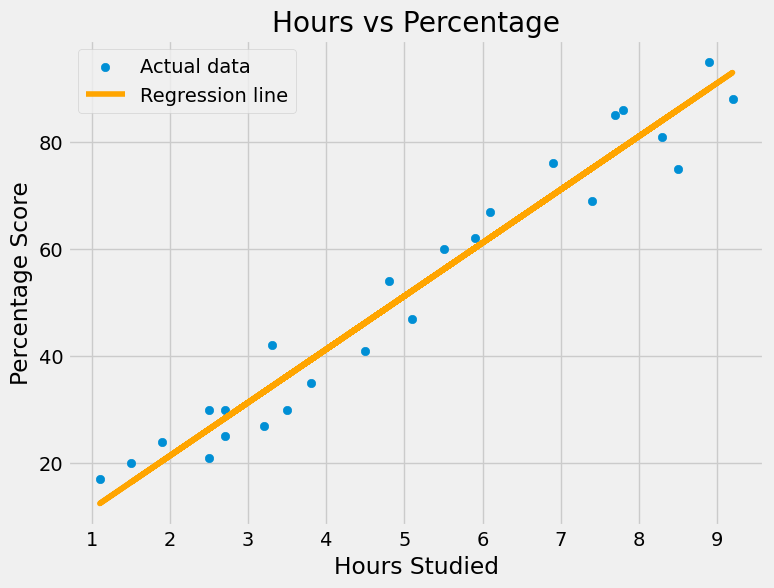

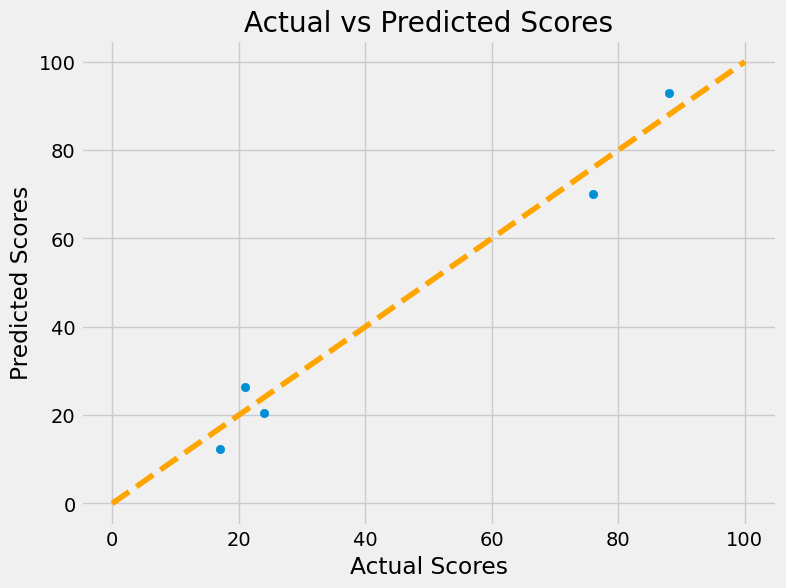

In [38]:
# Plotting the regression line
plt.figure(figsize=(8,6))
plt.scatter(X, y, label='Actual data')
plt.plot(X, model.predict(X), color='orange', label='Regression line')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.legend()
plt.show()

# Plotting predictions vs actual values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.plot([0, 100], [0, 100], '--', color='orange')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.title('Actual vs Predicted Scores')
plt.show()

**Answering the question, What will be predicted score if a student studies for 9.25 hrs/day?**

In [28]:
# Assign the variable you want to predict to hours and use the model to predict the score
hours = np.array([[9.25]])
my_pred = model.predict(hours)
print(f"According to the trained model, if a student studies for 9.25 hrs/day they are likely to achieve a score of {my_pred[0]:.2f} in the exam.")

According to the trained model, if a student studies for 9.25 hrs/day they are likely to achieve a score of 93.46 in the exam.


C:\Users\rayap\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Conclusion

In this project, we performed a simple linear regression analysis to predict the percentage score of a student based on the number of hours studied. The model was trained using the training set and evaluated using the test set. The Mean Absolute Error (MAE) and R-squared value indicated that the model has a reasonable accuracy in predicting the scores.

Further improvements could be made by collecting more data and possibly exploring more complex models if needed.